DATA QUALITY CHECK FOR ADVANCED VAE HYPERPARAMETER SELECTION

LOADING PREPROCESSED DATA

Data loaded successfully!

Dataset Overview:
  Total samples: 1336
  Unique genres: 7
  Genres: [np.str_('disco'), np.str_('hiphop'), np.str_('indie'), np.str_('metal'), np.str_('pop'), np.str_('rock'), np.str_('traditional')]

DATA SHAPE ANALYSIS

┌─────────────────────────────────────────────────────────────────────┐
│                        DATA DIMENSIONS                              │
├─────────────────────────────────────────────────────────────────────┤
│ Mel Spectrograms (raw):                          (1336, 256, 1024) │
│ Mel Spectrograms (normalized):                   (1336, 256, 1024) │
│ MFCCs (raw):                                      (1336, 60, 1024) │
│ MFCCs (normalized):                               (1336, 60, 1024) │
│ Flattened Features (raw):                              (1336, 330) │
│ Flattened Features (norm):                             (1336, 330) │
│ Lyrics Embeddings:

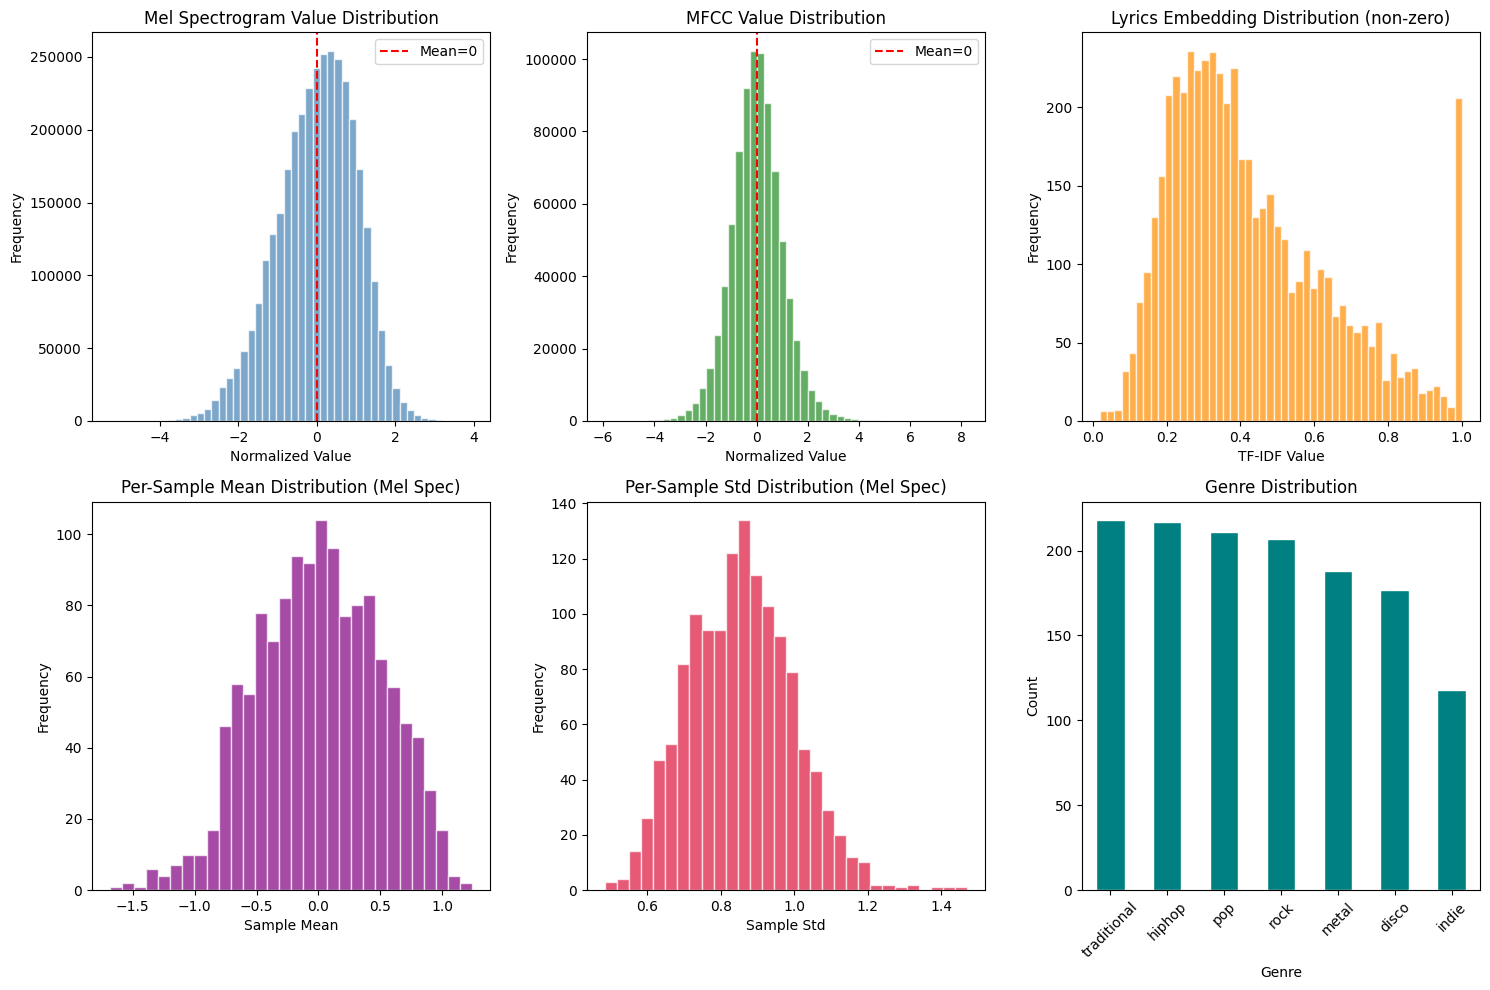

Distribution plots saved!

VISUALIZING SAMPLE SPECTROGRAMS


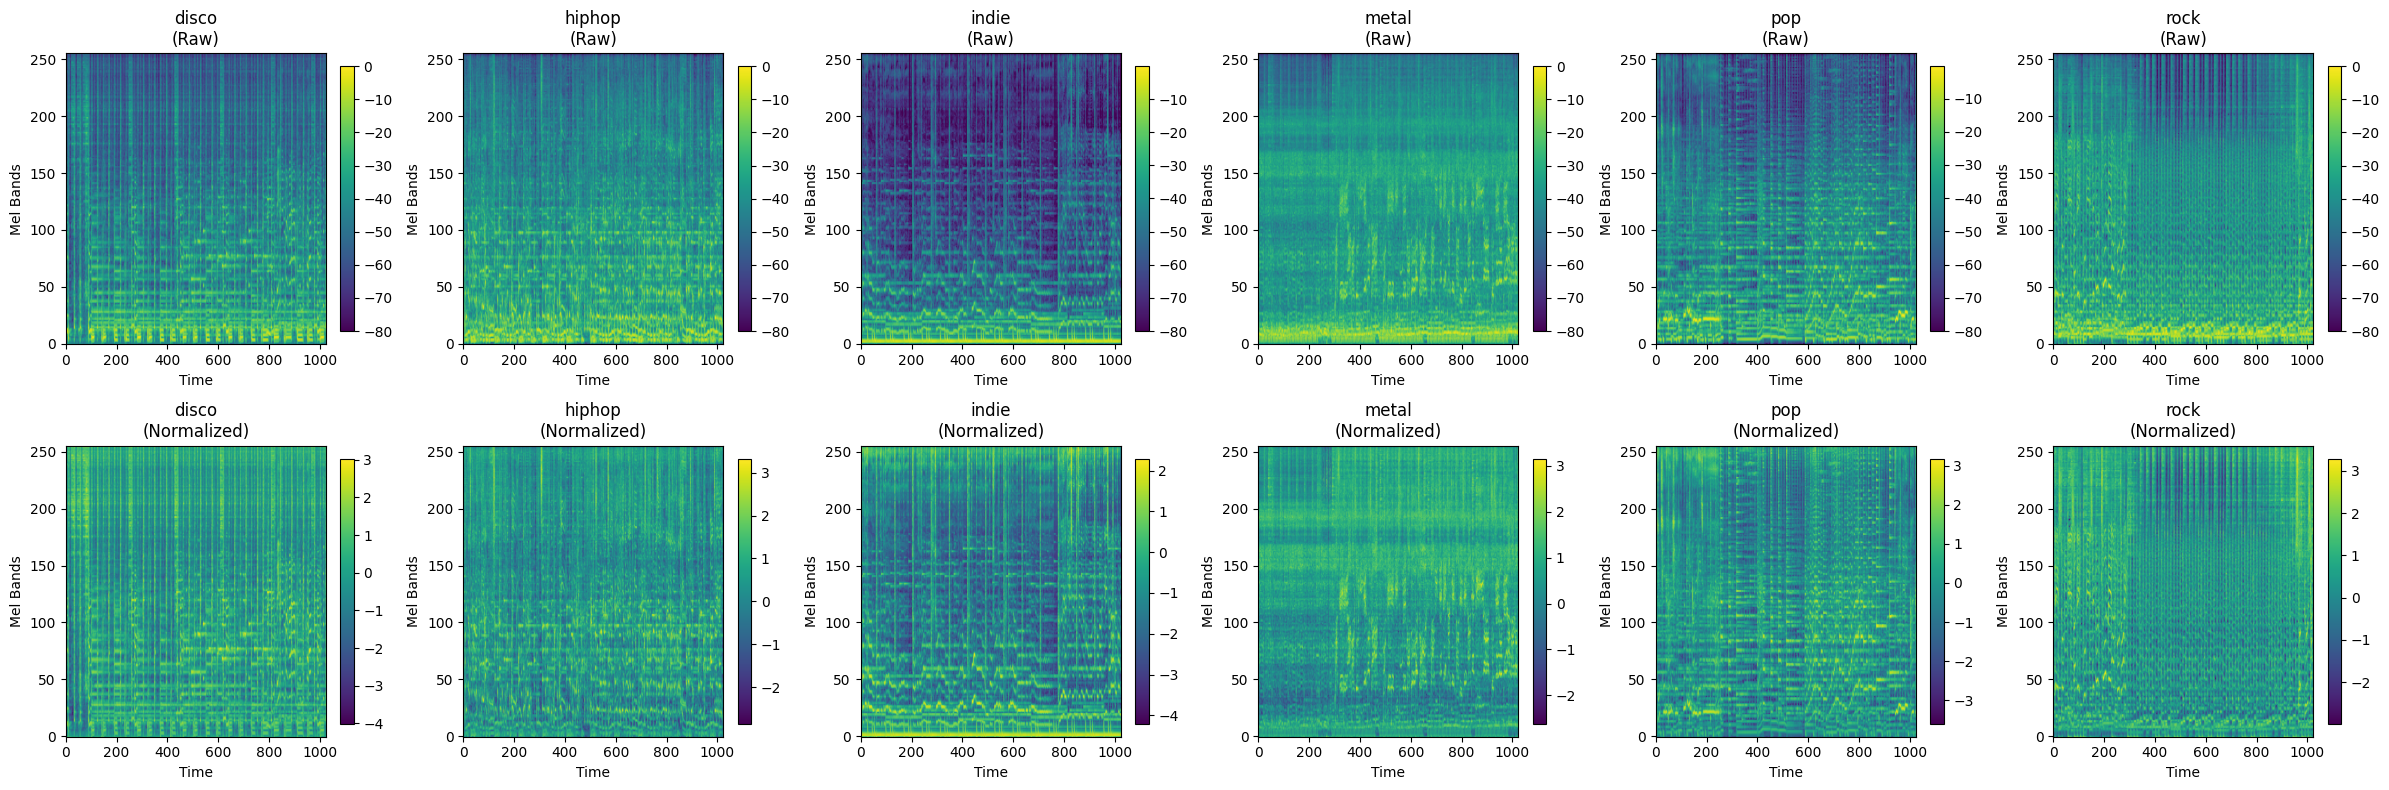

Sample spectrograms saved!

DIMENSIONALITY ANALYSIS (PCA)

Flattened spectrogram dimension: 262144

📊 PCA Analysis - Mel Spectrograms:
   Total dimensions: 262144
   Dimensions for 80% variance: 465
   Dimensions for 90% variance: 777
   Dimensions for 95% variance: 998
   Dimensions for 99% variance: 1238

📊 PCA Analysis - Lyrics Embeddings:
   Total dimensions: 100
   Dimensions for 80% variance: 60
   Dimensions for 90% variance: 76
   Dimensions for 95% variance: 86
   Dimensions for 99% variance: 96


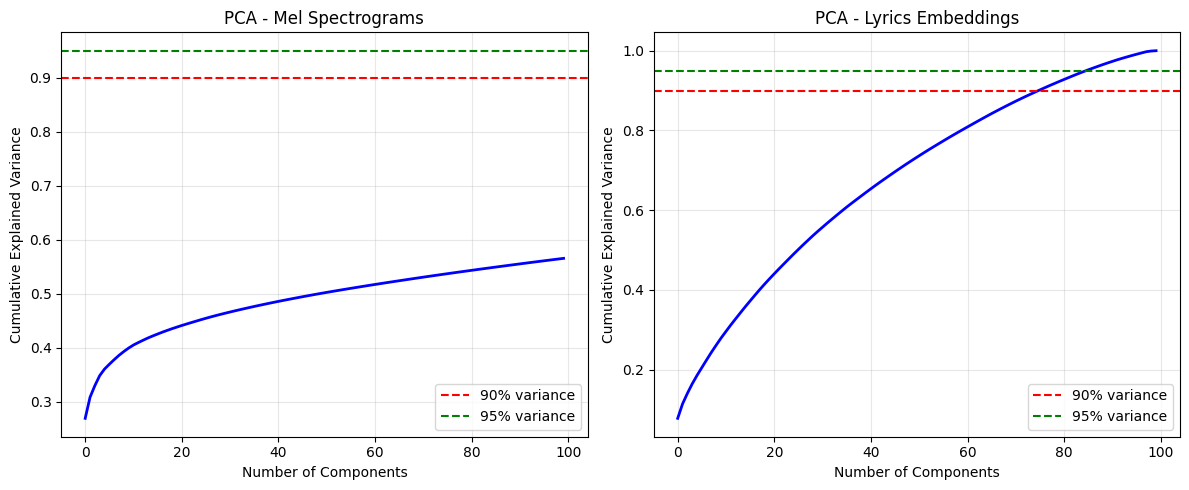


CLUSTER TENDENCY ANALYSIS

Testing K-Means with different K values...
   K= 2: Silhouette=0.2854, Inertia=112623288.00
   K= 3: Silhouette=0.1909, Inertia=96209104.00
   K= 4: Silhouette=0.1351, Inertia=90163680.00
   K= 5: Silhouette=0.1232, Inertia=86576920.00
   K= 6: Silhouette=0.1046, Inertia=83460528.00
   K= 7: Silhouette=0.1030, Inertia=80827008.00
   K= 8: Silhouette=0.0938, Inertia=78724376.00
   K= 9: Silhouette=0.0865, Inertia=77010904.00
   K=10: Silhouette=0.0931, Inertia=75469968.00
   K=11: Silhouette=0.0840, Inertia=74141056.00
   K=12: Silhouette=0.0811, Inertia=73034112.00
   K=13: Silhouette=0.0794, Inertia=72251712.00
   K=14: Silhouette=0.0780, Inertia=71329800.00

✅ Optimal K (by Silhouette): 2
   True number of genres: 7


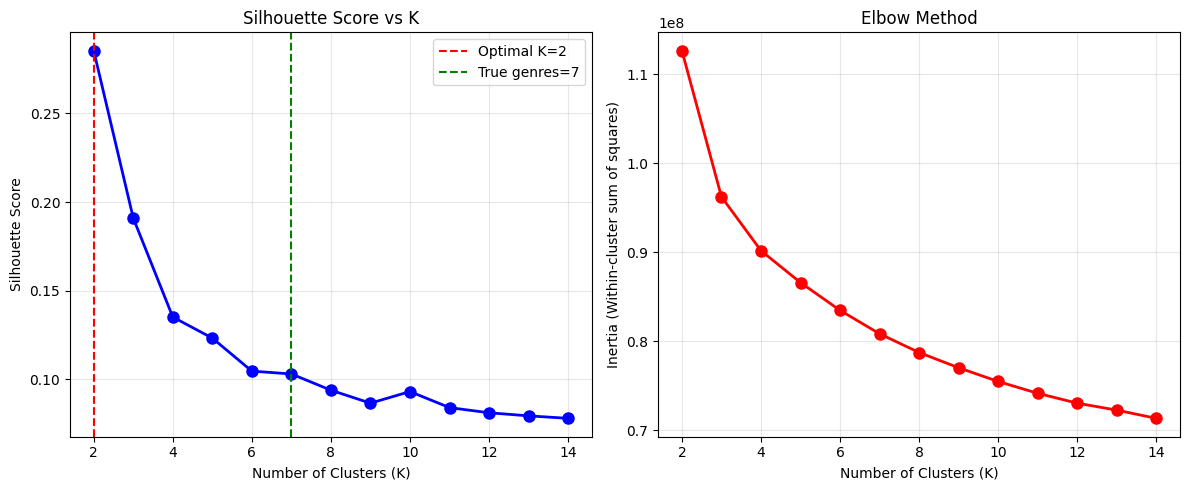


FEATURE CORRELATION ANALYSIS


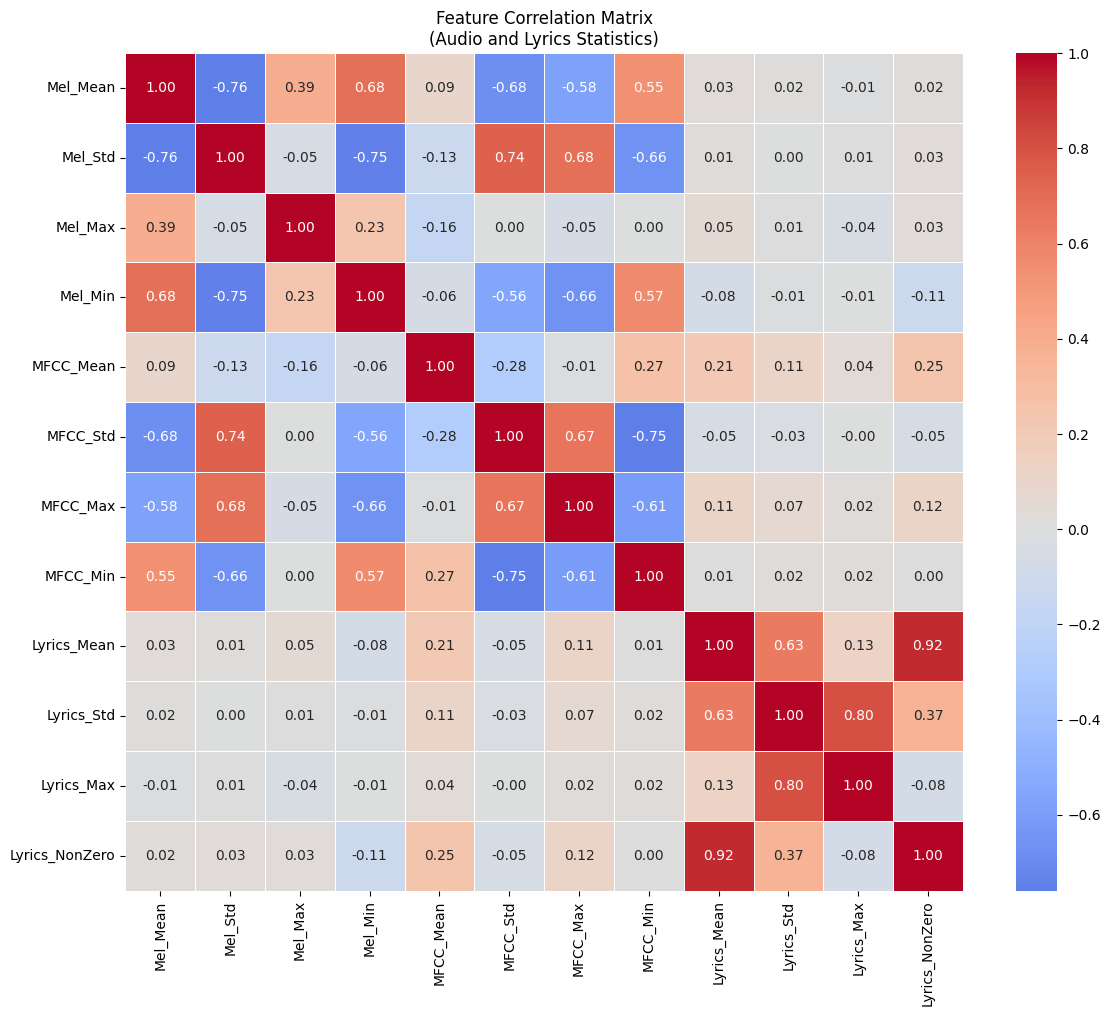

Correlation analysis complete!

HYPERPARAMETER RECOMMENDATIONS

Based on the data analysis, here are the recommended hyperparameters:

╔═══════════════════════════════════════════════════════════════════════╗
║                    CONVVAE RECOMMENDATIONS                             ║
╠═══════════════════════════════════════════════════════════════════════╣

║  Input Shape: (256, 1024)                                         ║
║                                                                       ║
║  conv_channels: [32, 64, 128] (for 4 conv layers)                        ║
║  - Start small (32) and double each layer                             ║
║  - More channels = more capacity but slower training                  ║
║                                                                       ║
║  latent_dim: 128                                                    ║
║  - Based on PCA: 998 dims capture 95% variance                       ║
║  - Recommend: 32-64 for good compression           

In [3]:
# ============================================================================
# DATA QUALITY CHECK FOR ADVANCED PREPROCESSING
# ============================================================================
# This file analyzes the preprocessed data from processed_data2 to help
# understand data characteristics and set hyperparameters for the Advanced VAE.
# ============================================================================

# ============================================================================
# CELL 1: Import Libraries
# ============================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

print("=" * 70)
print("DATA QUALITY CHECK FOR ADVANCED VAE HYPERPARAMETER SELECTION")
print("=" * 70)

# ============================================================================
# CELL 2: Load Data
# ============================================================================

DATA_PATH = r"f:\BRACU\Semester 12 Final\CSE425\FInal_project\processed_data2"

print("\n" + "=" * 70)
print("LOADING PREPROCESSED DATA")
print("=" * 70)

# Load all data files
mel_spectrograms_raw = np.load(os.path.join(DATA_PATH, 'mel_spectrograms_raw.npy'))
mel_spectrograms_norm = np.load(os.path.join(DATA_PATH, 'mel_spectrograms_normalized.npy'))
mfccs_raw = np.load(os.path.join(DATA_PATH, 'mfccs_raw.npy'))
mfccs_norm = np.load(os.path.join(DATA_PATH, 'mfccs_normalized.npy'))
flat_features_raw = np.load(os.path.join(DATA_PATH, 'features_raw.npy'))
flat_features_norm = np.load(os.path.join(DATA_PATH, 'features_normalized.npy'))
lyrics_embeddings = np.load(os.path.join(DATA_PATH, 'lyrics_embeddings.npy'))
labels = np.load(os.path.join(DATA_PATH, 'labels.npy'), allow_pickle=True)
metadata = pd.read_csv(os.path.join(DATA_PATH, 'metadata.csv'))

print("\nData loaded successfully!")
print(f"\nDataset Overview:")
print(f"  Total samples: {len(labels)}")
print(f"  Unique genres: {len(np.unique(labels))}")
print(f"  Genres: {list(np.unique(labels))}")

# ============================================================================
# CELL 3: Data Shape Analysis
# ============================================================================

print("\n" + "=" * 70)
print("DATA SHAPE ANALYSIS")
print("=" * 70)

print("\n┌─────────────────────────────────────────────────────────────────────┐")
print("│                        DATA DIMENSIONS                              │")
print("├─────────────────────────────────────────────────────────────────────┤")
print(f"│ Mel Spectrograms (raw):        {str(mel_spectrograms_raw.shape):>35} │")
print(f"│ Mel Spectrograms (normalized): {str(mel_spectrograms_norm.shape):>35} │")
print(f"│ MFCCs (raw):                   {str(mfccs_raw.shape):>35} │")
print(f"│ MFCCs (normalized):            {str(mfccs_norm.shape):>35} │")
print(f"│ Flattened Features (raw):      {str(flat_features_raw.shape):>35} │")
print(f"│ Flattened Features (norm):     {str(flat_features_norm.shape):>35} │")
print(f"│ Lyrics Embeddings:             {str(lyrics_embeddings.shape):>35} │")
print("└─────────────────────────────────────────────────────────────────────┘")

# CNN Input shape analysis
n_samples, n_mels, n_time_steps = mel_spectrograms_norm.shape
n_mfcc_coeffs = mfccs_norm.shape[1]

print("\n📊 Key Dimensions for ConvVAE:")
print(f"   • Input Height (n_mels): {n_mels}")
print(f"   • Input Width (time_steps): {n_time_steps}")
print(f"   • Total pixels per spectrogram: {n_mels * n_time_steps:,}")
print(f"   • MFCC coefficients: {n_mfcc_coeffs}")
print(f"   • Lyrics embedding dim: {lyrics_embeddings.shape[1]}")

# ============================================================================
# CELL 4: Statistical Analysis - Mel Spectrograms
# ============================================================================

print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS - MEL SPECTROGRAMS")
print("=" * 70)

# Raw statistics
print("\n🔹 RAW Mel Spectrograms:")
print(f"   Min value:  {mel_spectrograms_raw.min():.4f}")
print(f"   Max value:  {mel_spectrograms_raw.max():.4f}")
print(f"   Mean:       {mel_spectrograms_raw.mean():.4f}")
print(f"   Std:        {mel_spectrograms_raw.std():.4f}")
print(f"   Median:     {np.median(mel_spectrograms_raw):.4f}")

# Normalized statistics
print("\n🔹 NORMALIZED Mel Spectrograms:")
print(f"   Min value:  {mel_spectrograms_norm.min():.4f}")
print(f"   Max value:  {mel_spectrograms_norm.max():.4f}")
print(f"   Mean:       {mel_spectrograms_norm.mean():.4f}")
print(f"   Std:        {mel_spectrograms_norm.std():.4f}")
print(f"   Median:     {np.median(mel_spectrograms_norm):.4f}")

# Check for issues
print("\n⚠️  Data Quality Checks:")
nan_count = np.isnan(mel_spectrograms_norm).sum()
inf_count = np.isinf(mel_spectrograms_norm).sum()
zero_count = (mel_spectrograms_norm == 0).sum()
print(f"   NaN values:  {nan_count} ({nan_count/(mel_spectrograms_norm.size)*100:.2f}%)")
print(f"   Inf values:  {inf_count}")
print(f"   Zero values: {zero_count} ({zero_count/(mel_spectrograms_norm.size)*100:.2f}%)")

# Per-sample statistics
sample_means = mel_spectrograms_norm.reshape(n_samples, -1).mean(axis=1)
sample_stds = mel_spectrograms_norm.reshape(n_samples, -1).std(axis=1)
print(f"\n   Per-sample mean range: [{sample_means.min():.4f}, {sample_means.max():.4f}]")
print(f"   Per-sample std range:  [{sample_stds.min():.4f}, {sample_stds.max():.4f}]")

# ============================================================================
# CELL 5: Statistical Analysis - MFCCs
# ============================================================================

print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS - MFCCs")
print("=" * 70)

# Raw statistics
print("\n🔹 RAW MFCCs:")
print(f"   Min value:  {mfccs_raw.min():.4f}")
print(f"   Max value:  {mfccs_raw.max():.4f}")
print(f"   Mean:       {mfccs_raw.mean():.4f}")
print(f"   Std:        {mfccs_raw.std():.4f}")

# Normalized statistics
print("\n🔹 NORMALIZED MFCCs:")
print(f"   Min value:  {mfccs_norm.min():.4f}")
print(f"   Max value:  {mfccs_norm.max():.4f}")
print(f"   Mean:       {mfccs_norm.mean():.4f}")
print(f"   Std:        {mfccs_norm.std():.4f}")

# Check for issues
nan_count_mfcc = np.isnan(mfccs_norm).sum()
inf_count_mfcc = np.isinf(mfccs_norm).sum()
print(f"\n⚠️  NaN values: {nan_count_mfcc}, Inf values: {inf_count_mfcc}")

# ============================================================================
# CELL 6: Statistical Analysis - Lyrics Embeddings
# ============================================================================

print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS - LYRICS EMBEDDINGS")
print("=" * 70)

print("\n🔹 Lyrics Embeddings (TF-IDF):")
print(f"   Min value:  {lyrics_embeddings.min():.4f}")
print(f"   Max value:  {lyrics_embeddings.max():.4f}")
print(f"   Mean:       {lyrics_embeddings.mean():.4f}")
print(f"   Std:        {lyrics_embeddings.std():.4f}")
print(f"   Sparsity:   {(lyrics_embeddings == 0).sum() / lyrics_embeddings.size * 100:.2f}%")

# Check for empty lyrics
empty_lyrics = (lyrics_embeddings.sum(axis=1) == 0).sum()
print(f"\n⚠️  Samples with empty lyrics: {empty_lyrics} ({empty_lyrics/n_samples*100:.2f}%)")

# Non-zero features per sample
nonzero_per_sample = (lyrics_embeddings != 0).sum(axis=1)
print(f"   Average non-zero features per sample: {nonzero_per_sample.mean():.1f}")
print(f"   Range: [{nonzero_per_sample.min()}, {nonzero_per_sample.max()}]")

# ============================================================================
# CELL 7: Class Distribution Analysis
# ============================================================================

print("\n" + "=" * 70)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 70)

# Genre distribution
genre_counts = pd.Series(labels).value_counts()
print("\n📊 Genre Distribution:")
for genre, count in genre_counts.items():
    pct = count / len(labels) * 100
    bar = "█" * int(pct / 2)
    print(f"   {genre:15s} {count:4d} ({pct:5.1f}%) {bar}")

# Language distribution
if 'language' in metadata.columns:
    lang_counts = metadata['language'].value_counts()
    print("\n📊 Language Distribution:")
    for lang, count in lang_counts.items():
        lang_name = "Bangla" if lang == 'bn' else "English"
        pct = count / len(labels) * 100
        print(f"   {lang_name:15s} {count:4d} ({pct:5.1f}%)")

# Check class balance
imbalance_ratio = genre_counts.max() / genre_counts.min()
print(f"\n⚠️  Class Imbalance Ratio: {imbalance_ratio:.2f}x")
if imbalance_ratio > 2:
    print("   WARNING: Significant class imbalance detected!")
    print("   Consider: weighted sampling, data augmentation, or balanced batches")

# ============================================================================
# CELL 8: Visualization - Data Distributions
# ============================================================================

print("\n" + "=" * 70)
print("CREATING DISTRIBUTION VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Mel spectrogram value distribution
ax = axes[0, 0]
sample_vals = mel_spectrograms_norm.flatten()[::100]  # Subsample for speed
ax.hist(sample_vals, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
ax.axvline(x=0, color='red', linestyle='--', label='Mean=0')
ax.set_xlabel('Normalized Value')
ax.set_ylabel('Frequency')
ax.set_title('Mel Spectrogram Value Distribution')
ax.legend()

# 2. MFCC value distribution
ax = axes[0, 1]
mfcc_vals = mfccs_norm.flatten()[::100]
ax.hist(mfcc_vals, bins=50, color='forestgreen', edgecolor='white', alpha=0.7)
ax.axvline(x=0, color='red', linestyle='--', label='Mean=0')
ax.set_xlabel('Normalized Value')
ax.set_ylabel('Frequency')
ax.set_title('MFCC Value Distribution')
ax.legend()

# 3. Lyrics embedding distribution (non-zero values)
ax = axes[0, 2]
lyrics_nonzero = lyrics_embeddings[lyrics_embeddings > 0]
ax.hist(lyrics_nonzero, bins=50, color='darkorange', edgecolor='white', alpha=0.7)
ax.set_xlabel('TF-IDF Value')
ax.set_ylabel('Frequency')
ax.set_title('Lyrics Embedding Distribution (non-zero)')

# 4. Per-sample mean distribution
ax = axes[1, 0]
ax.hist(sample_means, bins=30, color='purple', edgecolor='white', alpha=0.7)
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Frequency')
ax.set_title('Per-Sample Mean Distribution (Mel Spec)')

# 5. Per-sample std distribution
ax = axes[1, 1]
ax.hist(sample_stds, bins=30, color='crimson', edgecolor='white', alpha=0.7)
ax.set_xlabel('Sample Std')
ax.set_ylabel('Frequency')
ax.set_title('Per-Sample Std Distribution (Mel Spec)')

# 6. Genre distribution bar chart
ax = axes[1, 2]
genre_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='white')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Genre Distribution')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(DATA_PATH, 'data_distributions.png'), dpi=150, bbox_inches='tight')
plt.show()

print("Distribution plots saved!")

# ============================================================================
# CELL 9: Sample Spectrograms Visualization
# ============================================================================

print("\n" + "=" * 70)
print("VISUALIZING SAMPLE SPECTROGRAMS")
print("=" * 70)

# Show sample spectrograms from different genres
unique_genres = np.unique(labels)
n_genres = min(6, len(unique_genres))

fig, axes = plt.subplots(2, n_genres, figsize=(4*n_genres, 8))

for i, genre in enumerate(unique_genres[:n_genres]):
    idx = np.where(labels == genre)[0][0]
    
    # Raw spectrogram
    ax = axes[0, i]
    im = ax.imshow(mel_spectrograms_raw[idx], aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f'{genre}\n(Raw)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mel Bands')
    plt.colorbar(im, ax=ax, fraction=0.046)
    
    # Normalized spectrogram
    ax = axes[1, i]
    im = ax.imshow(mel_spectrograms_norm[idx], aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f'{genre}\n(Normalized)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mel Bands')
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.savefig(os.path.join(DATA_PATH, 'sample_spectrograms.png'), dpi=150, bbox_inches='tight')
plt.show()

print("Sample spectrograms saved!")

# ============================================================================
# CELL 10: Dimensionality Analysis with PCA
# ============================================================================

print("\n" + "=" * 70)
print("DIMENSIONALITY ANALYSIS (PCA)")
print("=" * 70)

# Flatten spectrograms for PCA
mel_flat = mel_spectrograms_norm.reshape(n_samples, -1)
print(f"\nFlattened spectrogram dimension: {mel_flat.shape[1]}")

# PCA analysis
pca_full = PCA()
pca_full.fit(mel_flat)

# Cumulative explained variance
cumvar = np.cumsum(pca_full.explained_variance_ratio_)

# Find dimensions for different variance thresholds
thresholds = [0.80, 0.90, 0.95, 0.99]
dims_needed = {}
for thresh in thresholds:
    dims_needed[thresh] = np.argmax(cumvar >= thresh) + 1

print("\n📊 PCA Analysis - Mel Spectrograms:")
print(f"   Total dimensions: {mel_flat.shape[1]}")
for thresh, dims in dims_needed.items():
    print(f"   Dimensions for {thresh*100:.0f}% variance: {dims}")

# Similar analysis for lyrics
pca_lyrics = PCA()
pca_lyrics.fit(lyrics_embeddings)
cumvar_lyrics = np.cumsum(pca_lyrics.explained_variance_ratio_)

print("\n📊 PCA Analysis - Lyrics Embeddings:")
print(f"   Total dimensions: {lyrics_embeddings.shape[1]}")
for thresh in thresholds:
    dims = np.argmax(cumvar_lyrics >= thresh) + 1
    print(f"   Dimensions for {thresh*100:.0f}% variance: {dims}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
ax.plot(cumvar[:100], 'b-', linewidth=2)
ax.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
ax.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('PCA - Mel Spectrograms')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
ax.plot(cumvar_lyrics, 'b-', linewidth=2)
ax.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
ax.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('PCA - Lyrics Embeddings')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(DATA_PATH, 'pca_analysis.png'), dpi=150)
plt.show()

# ============================================================================
# CELL 11: Cluster Tendency Analysis
# ============================================================================

print("\n" + "=" * 70)
print("CLUSTER TENDENCY ANALYSIS")
print("=" * 70)

# Use PCA-reduced features for faster analysis
pca = PCA(n_components=50)
mel_pca = pca.fit_transform(mel_flat)

# Test different numbers of clusters
k_range = range(2, min(15, n_samples // 10))
silhouettes = []
inertias = []

print("\nTesting K-Means with different K values...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(mel_pca)
    sil = silhouette_score(mel_pca, labels_k)
    silhouettes.append(sil)
    inertias.append(kmeans.inertia_)
    print(f"   K={k:2d}: Silhouette={sil:.4f}, Inertia={kmeans.inertia_:.2f}")

# Find optimal K
optimal_k = list(k_range)[np.argmax(silhouettes)]
print(f"\n✅ Optimal K (by Silhouette): {optimal_k}")
print(f"   True number of genres: {len(np.unique(labels))}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
ax.plot(list(k_range), silhouettes, 'bo-', linewidth=2, markersize=8)
ax.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
ax.axvline(x=len(np.unique(labels)), color='g', linestyle='--', 
           label=f'True genres={len(np.unique(labels))}')
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs K')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
ax.plot(list(k_range), inertias, 'ro-', linewidth=2, markersize=8)
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('Inertia (Within-cluster sum of squares)')
ax.set_title('Elbow Method')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(DATA_PATH, 'cluster_analysis.png'), dpi=150)
plt.show()

# ============================================================================
# CELL 12: Feature Correlation Analysis
# ============================================================================

print("\n" + "=" * 70)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 70)

# Compute average spectrogram statistics per sample
mel_stats = np.column_stack([
    mel_spectrograms_norm.mean(axis=(1, 2)),  # mean
    mel_spectrograms_norm.std(axis=(1, 2)),   # std
    mel_spectrograms_norm.max(axis=(1, 2)),   # max
    mel_spectrograms_norm.min(axis=(1, 2)),   # min
])

mfcc_stats = np.column_stack([
    mfccs_norm.mean(axis=(1, 2)),
    mfccs_norm.std(axis=(1, 2)),
    mfccs_norm.max(axis=(1, 2)),
    mfccs_norm.min(axis=(1, 2)),
])

# Lyrics statistics
lyrics_stats = np.column_stack([
    lyrics_embeddings.mean(axis=1),
    lyrics_embeddings.std(axis=1),
    lyrics_embeddings.max(axis=1),
    (lyrics_embeddings != 0).sum(axis=1),  # non-zero count
])

# Combine for correlation
combined_stats = np.column_stack([mel_stats, mfcc_stats, lyrics_stats])
stat_names = [
    'Mel_Mean', 'Mel_Std', 'Mel_Max', 'Mel_Min',
    'MFCC_Mean', 'MFCC_Std', 'MFCC_Max', 'MFCC_Min',
    'Lyrics_Mean', 'Lyrics_Std', 'Lyrics_Max', 'Lyrics_NonZero'
]

corr_df = pd.DataFrame(combined_stats, columns=stat_names)
correlation_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix\n(Audio and Lyrics Statistics)')
plt.tight_layout()
plt.savefig(os.path.join(DATA_PATH, 'feature_correlation.png'), dpi=150)
plt.show()

print("Correlation analysis complete!")

# ============================================================================
# CELL 13: Hyperparameter Recommendations
# ============================================================================

print("\n" + "=" * 70)
print("HYPERPARAMETER RECOMMENDATIONS")
print("=" * 70)

print("""
Based on the data analysis, here are the recommended hyperparameters:

╔═══════════════════════════════════════════════════════════════════════╗
║                    CONVVAE RECOMMENDATIONS                             ║
╠═══════════════════════════════════════════════════════════════════════╣
""")

# Calculate recommendations
total_pixels = n_mels * n_time_steps
recommended_latent = min(dims_needed.get(0.95, 64), 128)

# Convolutional layers calculation
n_conv_layers = 0
h, w = n_mels, n_time_steps
while h >= 4 and w >= 4:
    h, w = h // 2, w // 2
    n_conv_layers += 1
n_conv_layers = min(n_conv_layers, 4)  # Max 4 layers

print(f"║  Input Shape: ({n_mels}, {n_time_steps})                                         ║")
print(f"║                                                                       ║")
print(f"║  conv_channels: [32, 64, 128] (for {n_conv_layers} conv layers)                        ║")
print(f"║  - Start small (32) and double each layer                             ║")
print(f"║  - More channels = more capacity but slower training                  ║")
print(f"║                                                                       ║")
print(f"║  latent_dim: {recommended_latent:3d}                                                    ║")
print(f"║  - Based on PCA: {dims_needed.get(0.95, 64)} dims capture 95% variance                       ║")
print(f"║  - Recommend: 32-64 for good compression                              ║")
print(f"║                                                                       ║")
print(f"║  batch_size: 32                                                       ║")
print(f"║  - With {n_samples} samples, this gives ~{n_samples//32} batches/epoch                      ║")
print(f"║                                                                       ║")
print(f"║  learning_rate: 1e-3 (with scheduler)                                 ║")
print(f"║  - Use ReduceLROnPlateau with patience=10                             ║")
print(f"║                                                                       ║")
print(f"║  beta (KL weight): 1.0                                                ║")
print(f"║  - Start with 1.0, reduce to 0.5-0.1 if reconstruction poor           ║")
print("╚═══════════════════════════════════════════════════════════════════════╝")

print("""
╔═══════════════════════════════════════════════════════════════════════╗
║                    HYBRIDVAE RECOMMENDATIONS                           ║
╠═══════════════════════════════════════════════════════════════════════╣
""")

lyrics_dim = lyrics_embeddings.shape[1]
audio_latent = int(recommended_latent * 0.75)
lyrics_latent = int(recommended_latent * 0.25)

print(f"║  Audio latent dim: {audio_latent:3d} (~75% of total latent space)                  ║")
print(f"║  Lyrics latent dim: {lyrics_latent:3d} (~25% of total latent space)                  ║")
print(f"║  Total latent dim: {audio_latent + lyrics_latent:3d}                                                ║")
print(f"║                                                                       ║")
print(f"║  Lyrics encoder hidden dims: [128, 64]                                ║")
print(f"║  - Input: {lyrics_dim} (TF-IDF features)                                     ║")
print(f"║  - Sparsity: {(lyrics_embeddings == 0).sum() / lyrics_embeddings.size * 100:.1f}% (may need dropout)                              ║")
print(f"║                                                                       ║")
print(f"║  audio_weight: 0.7, lyrics_weight: 0.3                                ║")
print(f"║  - Audio has more information, weight it higher                       ║")
print(f"║  - Adjust if lyrics reconstruction is important                       ║")
print("╚═══════════════════════════════════════════════════════════════════════╝")

print("""
╔═══════════════════════════════════════════════════════════════════════╗
║                    CLUSTERING RECOMMENDATIONS                          ║
╠═══════════════════════════════════════════════════════════════════════╣
""")

print(f"║  K-Means:                                                             ║")
print(f"║  - n_clusters: {optimal_k} (optimal) or {len(np.unique(labels))} (true genres)                     ║")
print(f"║  - n_init: 10 for stability                                           ║")
print(f"║                                                                       ║")
print(f"║  Agglomerative:                                                       ║")
print(f"║  - linkage: 'ward' (recommended for Euclidean distance)               ║")
print(f"║  - n_clusters: same as K-Means                                        ║")
print(f"║                                                                       ║")
print(f"║  DBSCAN:                                                              ║")
print(f"║  - eps: Use k-distance graph (auto-calculated)                        ║")
print(f"║  - min_samples: 5 (good default for this dataset size)                ║")
print("╚═══════════════════════════════════════════════════════════════════════╝")

# ============================================================================
# CELL 14: Data Quality Summary
# ============================================================================

print("\n" + "=" * 70)
print("DATA QUALITY SUMMARY")
print("=" * 70)

quality_issues = []
quality_good = []

# Check normalization
if abs(mel_spectrograms_norm.mean()) < 0.1 and 0.8 < mel_spectrograms_norm.std() < 1.2:
    quality_good.append("✅ Mel spectrograms are properly normalized (mean≈0, std≈1)")
else:
    quality_issues.append("⚠️  Mel spectrogram normalization may need adjustment")

# Check for NaN/Inf
if nan_count == 0 and inf_count == 0:
    quality_good.append("✅ No NaN or Inf values in mel spectrograms")
else:
    quality_issues.append(f"❌ Found {nan_count} NaN and {inf_count} Inf values")

# Check class balance
if imbalance_ratio < 2:
    quality_good.append("✅ Class distribution is reasonably balanced")
else:
    quality_issues.append(f"⚠️  Class imbalance ratio is {imbalance_ratio:.2f}x")

# Check lyrics coverage
if empty_lyrics / n_samples < 0.1:
    quality_good.append("✅ Most samples have lyrics data")
else:
    quality_issues.append(f"⚠️  {empty_lyrics} samples ({empty_lyrics/n_samples*100:.1f}%) have empty lyrics")

# Check sample size
if n_samples >= 500:
    quality_good.append(f"✅ Good sample size ({n_samples} samples)")
elif n_samples >= 200:
    quality_good.append(f"⚠️  Moderate sample size ({n_samples} samples) - may need regularization")
else:
    quality_issues.append(f"❌ Small sample size ({n_samples} samples) - risk of overfitting")

print("\n🟢 POSITIVE FINDINGS:")
for item in quality_good:
    print(f"   {item}")

if quality_issues:
    print("\n🟡 ISSUES TO ADDRESS:")
    for item in quality_issues:
        print(f"   {item}")
else:
    print("\n🟡 No significant issues found!")

# ============================================================================
# CELL 15: Save Summary Report
# ============================================================================

print("\n" + "=" * 70)
print("SAVING SUMMARY REPORT")
print("=" * 70)

report = {
    'n_samples': n_samples,
    'n_genres': len(np.unique(labels)),
    'mel_shape': mel_spectrograms_norm.shape,
    'mfcc_shape': mfccs_norm.shape,
    'lyrics_shape': lyrics_embeddings.shape,
    'mel_mean': float(mel_spectrograms_norm.mean()),
    'mel_std': float(mel_spectrograms_norm.std()),
    'class_imbalance_ratio': float(imbalance_ratio),
    'empty_lyrics_pct': float(empty_lyrics / n_samples * 100),
    'optimal_k_silhouette': int(optimal_k),
    'true_n_genres': int(len(np.unique(labels))),
    'pca_dims_95_variance': int(dims_needed.get(0.95, 64)),
    'recommended_latent_dim': int(recommended_latent),
    'recommended_audio_latent': int(audio_latent),
    'recommended_lyrics_latent': int(lyrics_latent),
}

# Save as CSV for easy viewing
report_df = pd.DataFrame([report])
report_df.to_csv(os.path.join(DATA_PATH, 'data_quality_report.csv'), index=False)

print(f"Report saved to: {os.path.join(DATA_PATH, 'data_quality_report.csv')}")

print("\n" + "=" * 70)
print("DATA QUALITY CHECK COMPLETE!")
print("=" * 70)
print("""
Generated files:
  - data_distributions.png
  - sample_spectrograms.png
  - pca_analysis.png
  - cluster_analysis.png
  - feature_correlation.png
  - data_quality_report.csv
  
Use the recommendations above to set hyperparameters for 3_advanced_vae_clustering.py!
""")
